<a href="https://colab.research.google.com/github/FariaParvinMegha/final_work/blob/main/Copy_of_final_arousal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install git+https://github.com/forrestbao/pyeeg.git

!pip install keras-self-attention

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-mfa3q0pf
  Running command git clone --filter=blob:none --quiet https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-mfa3q0pf
  Resolved https://github.com/forrestbao/pyeeg.git to commit a6c18bb093e4748f9d9c208535a6ae024a0802b8
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import pyeeg as pe
import pickle as pickle
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn import svm
import tensorflow as tf
import os
import time
import keras
import keras.backend as K

import tensorflow as tf
from tensorflow import keras
from keras.metrics import Precision, Recall
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv1D
from keras.models import Model
from keras.utils import plot_model

import timeit
from keras.layers import MaxPooling1D, ZeroPadding1D
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, Conv2D, MaxPooling2D, Reshape, Bidirectional, LSTM, Dense, Lambda, Activation, BatchNormalization, Dropout
from keras_self_attention import SeqSelfAttention
from keras.layers import (Input, Embedding, Conv1D, Activation, GlobalMaxPooling1D, BatchNormalization,
                          Concatenate, LSTM, Flatten, Dropout, Dense)

In [ ]:
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [ ]:
np.load = np_load_old

FOR AROUSAL

In [ ]:
with open('/content/drive/MyDrive/data_training/data_training.npy', 'rb') as fileTrain:
    X  = np.load(fileTrain)

with open('/content/drive/MyDrive/label_training/label_training.npy', 'rb') as fileTrainL:
    Y  = np.load(fileTrainL)


X = normalize(X)
Z = np.ravel(Y[:, [0]])

Arousal_Train = np.ravel(Y[:, [0]])
Valence_Train = np.ravel(Y[:, [1]])
Dominance_Train = np.ravel(Y[:, [2]])
Like_Train = np.ravel(Y[:, [3]])

for i in range(len(Z)):
  if Z[i] == 9:
    Z[i] = 8.99

In [ ]:
A=np.copy(Z)

np.unique(Z)

array([1.  , 1.01, 1.03, 1.04, 1.08, 1.1 , 1.15, 1.21, 1.22, 1.23, 1.35,
       1.36, 1.38, 1.4 , 1.45, 1.47, 1.62, 1.67, 1.74, 1.77, 1.79, 1.82,
       1.83, 1.85, 1.86, 1.88, 1.9 , 1.91, 1.92, 1.94, 1.95, 1.96, 1.97,
       1.99, 2.  , 2.01, 2.03, 2.04, 2.05, 2.06, 2.08, 2.09, 2.12, 2.13,
       2.14, 2.17, 2.19, 2.26, 2.28, 2.31, 2.32, 2.33, 2.36, 2.41, 2.44,
       2.46, 2.47, 2.5 , 2.51, 2.53, 2.54, 2.59, 2.64, 2.67, 2.68, 2.71,
       2.72, 2.78, 2.79, 2.81, 2.82, 2.85, 2.86, 2.87, 2.88, 2.9 , 2.92,
       2.94, 2.95, 2.96, 2.97, 2.99, 3.  , 3.01, 3.03, 3.04, 3.05, 3.06,
       3.08, 3.09, 3.1 , 3.12, 3.13, 3.15, 3.17, 3.18, 3.19, 3.21, 3.22,
       3.23, 3.24, 3.26, 3.27, 3.28, 3.31, 3.33, 3.36, 3.37, 3.38, 3.4 ,
       3.45, 3.46, 3.47, 3.49, 3.5 , 3.51, 3.55, 3.59, 3.6 , 3.62, 3.64,
       3.65, 3.71, 3.72, 3.73, 3.74, 3.77, 3.81, 3.82, 3.83, 3.85, 3.86,
       3.87, 3.88, 3.9 , 3.91, 3.92, 3.94, 3.95, 3.96, 3.97, 3.99, 4.  ,
       4.01, 4.03, 4.04, 4.05, 4.06, 4.08, 4.09, 4.

In [ ]:
# AROUSAL classes
negative = 0
neutral = 0
positive = 0
for i in range(len(A)):
  if A[i] >= 1 and A[i]<=2.99:
    A [i] = 1
    negative = negative + 1
  if A[i] >= 3 and A[i]<=5.99:
    A [i] = 2
    neutral = neutral + 1
  if A[i] >= 6 and A[i]<=8.99:
    A [i] = 3
    positive = positive + 1

print(negative,neutral, positive)

84328 202262 213122


In [ ]:
x_train = np.array(X[:])

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(A)
y_train = y_train[:,1:]
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
with open('/content/drive/MyDrive/data_validation/data_validation.npy', 'rb') as fileTrain:
    P  = np.load(fileTrain)

with open('/content/drive/MyDrive/label_validation/label_validation.npy', 'rb') as fileTrainL:
    Q  = np.load(fileTrainL)

P = normalize(P)
R = np.ravel(Q[:, [0]])

Arousal_val = np.ravel(Q[:, [0]])
Valence_val = np.ravel(Q[:, [1]])
Domain_val = np.ravel(Q[:, [2]])
Like_val = np.ravel(Q[:, [3]])

for i in range(len(R)):
  if R[i] == 9:
    R[i] = 8.99

In [ ]:
B=np.copy(R)

np.unique(R)

array([1.  , 1.01, 1.03, 1.04, 1.08, 1.1 , 1.15, 1.21, 1.22, 1.23, 1.35,
       1.36, 1.38, 1.4 , 1.45, 1.47, 1.62, 1.67, 1.74, 1.77, 1.79, 1.82,
       1.83, 1.85, 1.86, 1.88, 1.9 , 1.91, 1.92, 1.94, 1.95, 1.96, 1.97,
       1.99, 2.  , 2.01, 2.03, 2.04, 2.05, 2.06, 2.08, 2.09, 2.12, 2.13,
       2.14, 2.17, 2.19, 2.26, 2.28, 2.31, 2.32, 2.33, 2.36, 2.41, 2.44,
       2.46, 2.47, 2.5 , 2.51, 2.53, 2.54, 2.59, 2.64, 2.67, 2.68, 2.71,
       2.72, 2.78, 2.79, 2.81, 2.82, 2.85, 2.86, 2.87, 2.88, 2.9 , 2.92,
       2.94, 2.95, 2.96, 2.97, 2.99, 3.  , 3.01, 3.03, 3.04, 3.05, 3.06,
       3.08, 3.09, 3.1 , 3.12, 3.13, 3.15, 3.17, 3.18, 3.19, 3.21, 3.22,
       3.23, 3.24, 3.26, 3.27, 3.28, 3.31, 3.33, 3.36, 3.37, 3.38, 3.4 ,
       3.45, 3.46, 3.47, 3.49, 3.5 , 3.51, 3.55, 3.59, 3.6 , 3.62, 3.64,
       3.65, 3.71, 3.72, 3.73, 3.74, 3.77, 3.81, 3.82, 3.83, 3.85, 3.86,
       3.87, 3.88, 3.9 , 3.91, 3.92, 3.94, 3.95, 3.96, 3.97, 3.99, 4.  ,
       4.01, 4.03, 4.04, 4.05, 4.06, 4.08, 4.09, 4.

In [ ]:
# AROUSAL classes
negative_val = 0
neutral_val = 0
positive_val = 0
for i in range(len(B)):
  if B[i] >= 1 and B[i]<=2.99:
    B [i] = 1
    negative_val = negative_val + 1
  if B[i] >= 3 and B[i]<=5.99:
    B [i] = 2
    neutral_val = neutral_val + 1
  if B[i] >= 6 and B[i]<=8.99:
    B [i] = 3
    positive_val = positive_val + 1

print(negative_val,neutral_val, positive_val)

10540 25261 26663


In [ ]:
x_val = np.array(P[:])

In [ ]:
from keras.utils import to_categorical
y_val = to_categorical(B)
y_val = y_val[:,1:]
y_val

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
with open('/content/drive/MyDrive/data_testing/data_testing.npy', 'rb') as fileTrain:
    M  = np.load(fileTrain)

with open('/content/drive/MyDrive/label_testing/label_testing.npy', 'rb') as fileTrainL:
    N  = np.load(fileTrainL)

M = normalize(M)
L = np.ravel(N[:, [0]])

Arousal_Test = np.ravel(N[:, [0]])
Valence_Test = np.ravel(N[:, [1]])
Dominance_Test = np.ravel(N[:, [2]])
Like_Test = np.ravel(N[:, [3]])

for i in range(len(L)):
  if L[i] == 9:
    L[i] = 8.99

In [ ]:
C=np.copy(L)

np.unique(L)

array([1.  , 1.01, 1.03, 1.04, 1.08, 1.1 , 1.15, 1.21, 1.22, 1.23, 1.35,
       1.36, 1.38, 1.4 , 1.45, 1.47, 1.62, 1.67, 1.74, 1.77, 1.79, 1.82,
       1.83, 1.85, 1.86, 1.88, 1.9 , 1.91, 1.92, 1.94, 1.95, 1.96, 1.97,
       1.99, 2.  , 2.01, 2.03, 2.04, 2.05, 2.06, 2.08, 2.09, 2.12, 2.13,
       2.14, 2.17, 2.19, 2.26, 2.28, 2.31, 2.32, 2.33, 2.36, 2.41, 2.44,
       2.46, 2.47, 2.5 , 2.51, 2.53, 2.54, 2.59, 2.64, 2.67, 2.68, 2.71,
       2.72, 2.78, 2.79, 2.81, 2.82, 2.85, 2.86, 2.87, 2.88, 2.9 , 2.92,
       2.94, 2.95, 2.96, 2.97, 2.99, 3.  , 3.01, 3.03, 3.04, 3.05, 3.06,
       3.08, 3.09, 3.1 , 3.12, 3.13, 3.15, 3.17, 3.18, 3.19, 3.21, 3.22,
       3.23, 3.24, 3.26, 3.27, 3.28, 3.31, 3.33, 3.36, 3.37, 3.38, 3.4 ,
       3.45, 3.46, 3.47, 3.49, 3.5 , 3.51, 3.55, 3.59, 3.6 , 3.62, 3.64,
       3.65, 3.71, 3.72, 3.73, 3.74, 3.77, 3.81, 3.82, 3.83, 3.85, 3.86,
       3.87, 3.88, 3.9 , 3.91, 3.92, 3.94, 3.95, 3.96, 3.97, 3.99, 4.  ,
       4.01, 4.03, 4.04, 4.05, 4.06, 4.08, 4.09, 4.

In [ ]:
# AROUSAL classes
negative_test = 0
neutral_test = 0
positive_test = 0
for i in range(len(C)):
  if C[i] >= 1 and C[i]<=2.99:
    C [i] = 1
    negative_test = negative_test + 1
  if C[i] >= 3 and C[i]<=5.99:
    C [i] = 2
    neutral_test = neutral_test + 1
  if C[i] >= 6 and C[i]<=8.99:
    C [i] = 3
    positive_test = positive_test + 1

print(negative_test,neutral_test, positive_test)

10540 25261 26663


In [ ]:
x_test = np.array(M[:])

In [ ]:
from keras.utils import to_categorical
y_test = to_categorical(C)
y_test = y_test[:,1:]
y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_val = x_val.reshape(x_val.shape[0],x_val.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [ ]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(499712, 3)
(62464, 3)
(62464, 3)


In [ ]:
batch_size = 256
num_classes = 3
epochs = 10
input_shape=(x_train.shape[1], 1)

In [ ]:
print(input_shape)

(75, 1)


In [ ]:
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight=sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight=sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

Model CNN

In [ ]:
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense,GRU,SpatialDropout1D,Bidirectional
from keras.regularizers import l2

In [ ]:
modelA = Sequential()

intput_shape=(x_train.shape[1], 1)

modelA.add(Conv1D(1024, kernel_size=9,padding = 'same',activation='relu', input_shape=input_shape))
modelA.add(BatchNormalization())
modelA.add(MaxPooling1D(pool_size=(2)))

modelA.add(Conv1D(512,kernel_size=6,padding = 'same', activation='relu'))
modelA.add(BatchNormalization())
modelA.add(MaxPooling1D(pool_size=(2)))

modelA.add(Conv1D(256,kernel_size=6,padding = 'same', activation='relu'))
modelA.add(BatchNormalization())
modelA.add(MaxPooling1D(pool_size=(2)))

modelA.add(Conv1D(128,kernel_size=6,padding = 'same', activation='relu'))
modelA.add(BatchNormalization())
modelA.add(MaxPooling1D(pool_size=(2)))

modelA.add(Flatten())

modelA.add(Dense(1024, activation='relu'))
modelA.add(Dropout(0.2))

modelA.add(Dense(256, activation='relu'))
modelA.add(Dropout(0.2))

modelA.add(Dense(64, activation='relu'))
modelA.add(Dropout(0.2))

modelA.add(Dense(num_classesA, activation='softmax'))
modelA.summary()

Model CNN+BiLSTM

In [ ]:
model_HB = Sequential()

intput_shape=(x_train.shape[1], 1)

model_HB.add(Conv1D(1024, kernel_size=9,padding = 'same',activation='relu', input_shape=input_shape))
model_HB.add(BatchNormalization())
model_HB.add(MaxPooling1D(pool_size=(2)))

model_HB.add(Conv1D(512,kernel_size=6,padding = 'same', activation='relu'))
model_HB.add(BatchNormalization())
model_HB.add(MaxPooling1D(pool_size=(2)))

model_HB.add(Conv1D(256,kernel_size=6,padding = 'same', activation='relu'))
model_HB.add(BatchNormalization())
model_HB.add(MaxPooling1D(pool_size=(2)))

model_HB.add(Conv1D(128,kernel_size=6,padding = 'same', activation='relu'))
model_HB.add(BatchNormalization())
model_HB.add(MaxPooling1D(pool_size=(2)))


model_HB.add(LSTM(units=64,return_sequences=True))
model_HB.add(SeqSelfAttention(attention_activation='tanh'))
model_HB.add(Dropout(0.2))

model_HB.add(LSTM(units=128,return_sequences=True))
model_HB.add(SeqSelfAttention(attention_activation='tanh'))
model_HB.add(Dropout(0.2))

model_HB.add(LSTM(units=128,return_sequences=True))
model_HB.add(SeqSelfAttention(attention_activation='tanh'))
model_HB.add(Dropout(0.2))

model_HB.add(LSTM(units=256,return_sequences=True))
model_HB.add(SeqSelfAttention(attention_activation='tanh'))

model_HB.add(Flatten())

model_HB.add(Dense(1024, activation='relu'))
model_HB.add(Dropout(0.2))

model_HB.add(Dense(256, activation='relu'))
model_HB.add(Dropout(0.2))

model_HB.add(Dense(64, activation='relu'))
model_HB.add(Dropout(0.2))

model_HB.add(Dense(num_classes, activation='softmax'))

model_HB.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 75, 1024)          10240     
                                                                 
 batch_normalization_4 (Bat  (None, 75, 1024)          4096      
 chNormalization)                                                
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 37, 1024)          0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 37, 512)           3146240   
                                                                 
 batch_normalization_5 (Bat  (None, 37, 512)           2048      
 chNormalization)                                                
                                                      

In [ ]:
model_HB.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy', Precision(), F1Score()]
)

In [ ]:
model_name = "FHybrid_model"
directory_path = "/content/drive/MyDrive/Thesis"
weights_filename = "weights-improvement_" + model_name + ".hdf5"
os.makedirs(directory_path, exist_ok=True)

# Complete file path for the model weights
filepath_CLB = os.path.join(directory_path, weights_filename)
print("Model weights will be saved to:", filepath_CLB)

checkpoint = ModelCheckpoint(filepath_CLB, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15)

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', mode='max', factor=0.2, patience=2, min_lr=0.001, verbose=1)

# Combine all callbacks in a list
callbacks_list = [es, checkpoint, reduce_lr]

Model weights will be saved to: /content/drive/MyDrive/Thesis/weights-improvement_FHybrid_model.hdf5


In [ ]:
FHybridmodel = model_HB.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val),
          callbacks= callbacks_list)

Epoch 1/10
1952/1952 [==============================] - ETA: 0s - loss: 0.8341 - accuracy: 0.5910 - precision_2: 0.6684 - f1_score: 0.5306
Epoch 1: val_accuracy improved from -inf to 0.64021, saving model to /content/drive/MyDrive/Thesis/weights-improvement_FHybrid_model.hdf5
1952/1952 [==============================] - 212s 96ms/step - loss: 0.8341 - accuracy: 0.5910 - precision_2: 0.6684 - f1_score: 0.5306 - val_loss: 0.7555 - val_accuracy: 0.6402 - val_precision_2: 0.7079 - val_f1_score: 0.6033 - lr: 0.0010
Epoch 2/10
1952/1952 [==============================] - ETA: 0s - loss: 0.6830 - accuracy: 0.6827 - precision_2: 0.7425 - f1_score: 0.6597
Epoch 2: val_accuracy improved from 0.64021 to 0.71646, saving model to /content/drive/MyDrive/Thesis/weights-improvement_FHybrid_model.hdf5
1952/1952 [==============================] - 181s 93ms/step - loss: 0.6830 - accuracy: 0.6827 - precision_2: 0.7425 - f1_score: 0.6597 - val_loss: 0.6173 - val_accuracy: 0.7165 - val_precision_2: 0.7767 -

In [ ]:
score_Hybrid = model_HB.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score_Hybrid[0])
print('Test accuracy:', score_Hybrid[1])
print('Test precision:', score_Hybrid[2])
print('Test f1_score:', score_Hybrid[3])

1952/1952 [==============================] - 18s 8ms/step - loss: 0.3525 - accuracy: 0.8665 - precision_2: 0.8806 - f1_score: 0.8667
Test loss: 0.3525018095970154
Test accuracy: 0.8665151000022888
Test precision: 0.8805696368217468
Test f1_score: 0.8667159080505371


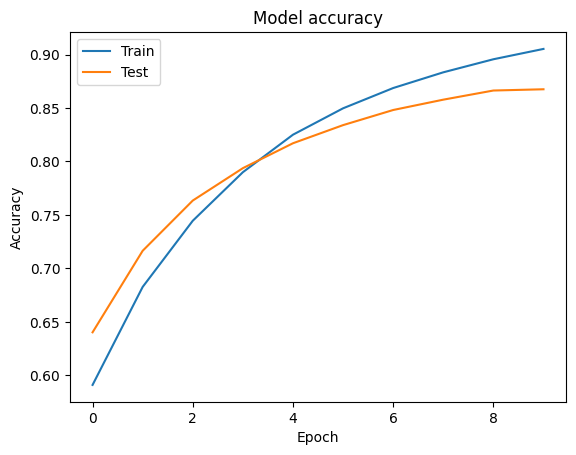

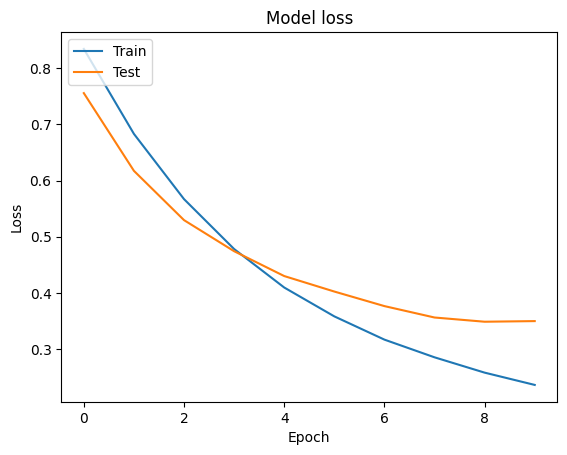

In [ ]:
# Plot training & validation accuracy values
plt.plot(FHybridmodel.history['accuracy'])
plt.plot(FHybridmodel.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(FHybridmodel.history['loss'])
plt.plot(FHybridmodel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1952/1952 [==============================] - 14s 6ms/step


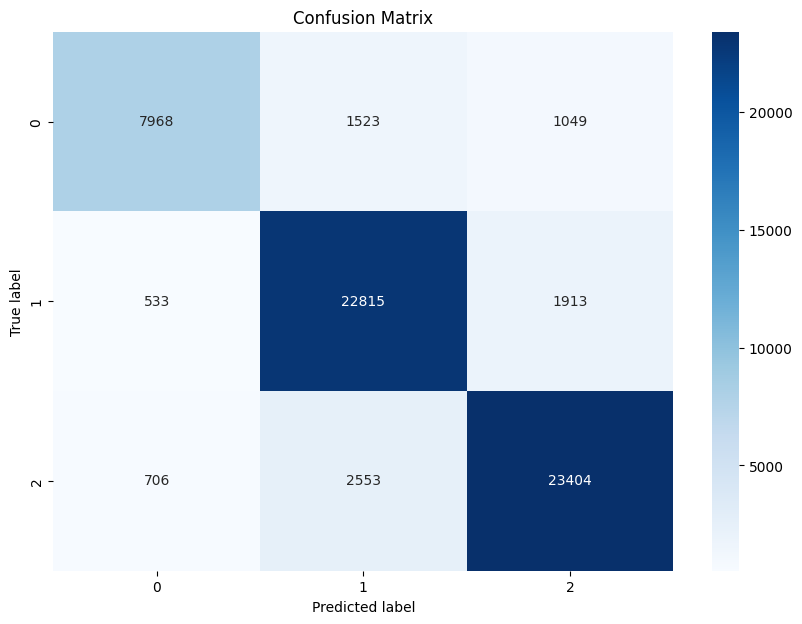

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert one-hot encoded predictions and labels to class indices
y_pred_classes = np.argmax(model_HB.predict(x_val), axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

1952/1952 [==============================] - 12s 6ms/step


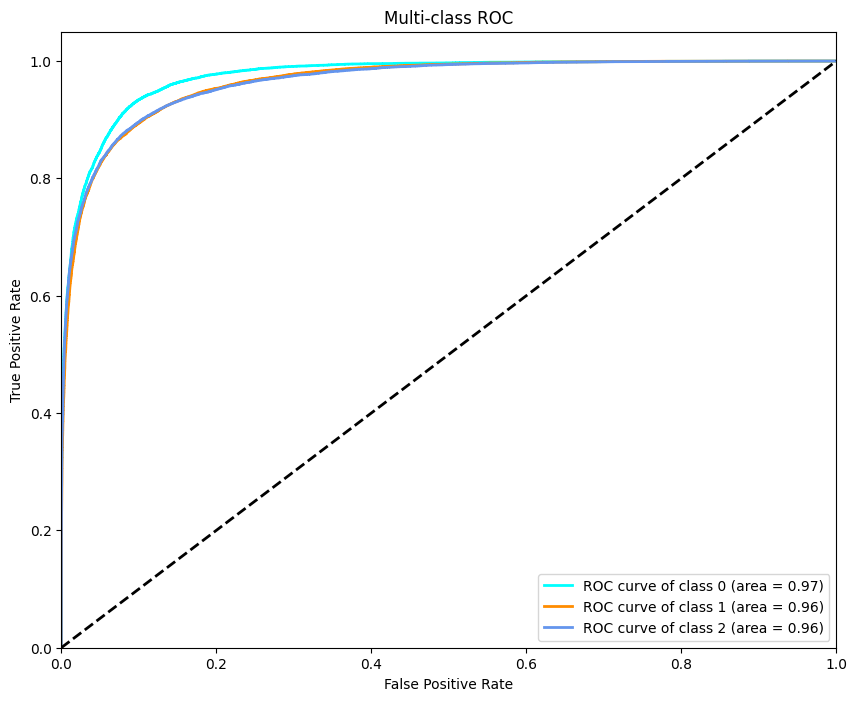

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from scipy import interp

# Assuming `model` is your trained CNN model
# `X_test` is your test data, `y_test` are your true labels (as integers 0, 1, 2 for negative, neutral, positive)

# Binarize the labels for ROC calculation
y_test_binarized = label_binarize(y_test, classes=[negative, neutral, positive])
n_classes = y_test_binarized.shape[1]

# Predict probabilities for each class
y_score = model_HB.predict(x_test)  # Ensure this gives you the probability for each class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 8))
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()


In [ ]:
base_path_model = "/content/drive/MyDrive/Thesis/"
accuracy = "_86"

path_model_HB = base_path_model + model_name + accuracy + ".h5"
model_HB.save(path_model_HB)
print(path_model_HB)

/content/drive/MyDrive/Thesis/FHybrid_model_86.h5
